In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('C:/Users/Will/mystuff/titanic/train.csv')
test_df = pd.read_csv('C:/Users/Will/mystuff/titanic/test.csv')
combine = [train_df, test_df]

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.info()
print('_'*40)
test_df.info()
# Shows the data types for the training and test data sets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [9]:
train_df.describe()
# Review survived rate using 'percentiles = [.61, .62]' knowing that the promblem describes a 38% survival ratio
# Review Parch distribution using 'percentiles = [.75, .8]'
# SibSp distribution '[.68, .69]'
# Age and Fare '[.1, .2, .3, .4, 5, .6, .7, .8, .9, .99]'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Above shows:
# 891 passengers
# survival is binary, and c38% of the sample survived, vs actual survival at 325
# >75% did not travel with parents or children
# ~ 30% had siblings or a spouse onboard
# Few elderly with <1% 65-80 range

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnston, Miss. Catherine Helen ""Carrie""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [11]:
# Above shows:
# Names are unique across the dataset
# Sex has two possible values and 577 were male (65%)
# Emarked has 3 possible values, the most used port was S
# There were 147 cabins, with some sharing, a lot in G6

# Completing | Correcting | Creating | Classifying
# 1) Completing:
# Complete features (like age/ embarked) that might not be fully completed already

# 2) Correcting:
# Ticket feature may be dropped as there are many duplicates (22%)
# Cabin could be dropped as it has a lot of incomplete or null data
# Passenger id likely does not correlate to survival
# Name is non-std and likely uncorrelated

# 3) Creating:
# We may want to create "family" using Parch and SibSp data
# Could engineer name to obtain "Title" instead
# Could create a new feature for age bands to turn a continuous variable into an ordinal categorical one
# Could also create a fare range

# 4) Classifying:
# We know from the problem that:
# a) Women (sex = female) were more likely to survive
# b) Childeren (age < ?) were more likely to survive
# c) Upper class (PClass = 1) were also more likely to survive

In [12]:
# We can now pivot features that don't have zero values against one another to show correlation
# Below shows class of traveller vs survival
# The chance of Pclass=1 and survival is >0.5 and thus significant
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# We can also do the same for sex:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


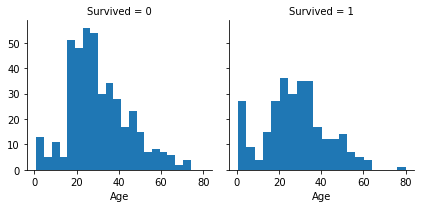

In [16]:
# We cannot draw much from Sibsp or Parch and so should create new features to analyse this data
sonia = sns.FacetGrid(train_df, col='Survived')
sonia.map(plt.hist, 'Age', bins=20)

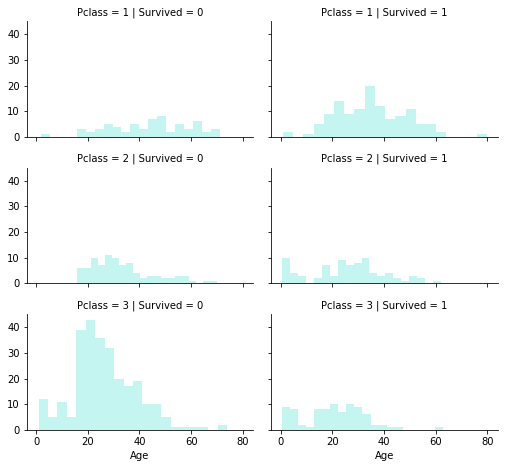

In [17]:
# Takeaways from above:
# Children <4 had high survival
# Most passengers are 15-35 age range
# A large amount of 15-25 year olds died

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.3, bins=20, color='Turquoise')
grid.add_legend();

# alpha is shade of charts, 1 = block colour, 0 = transparent

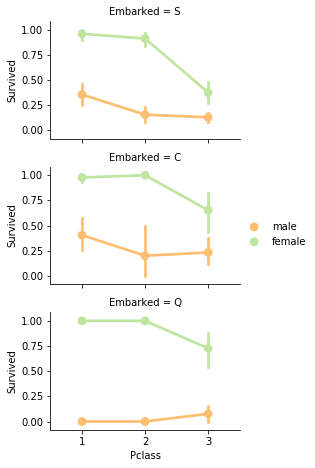

In [18]:
# Pclass = 3 had most passengers, but most did not survive
# Infants in Pclass 2 and 3 mostly survived
# More Pclass = 1 passengers survived than died
# It appears that Pclass skews with age (older = higher class)

# ** Decision - Consider Pclass for model training**

grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Spectral', order=[1,2,3], hue_order=["male", "female"])
grid.add_legend()

C:\Users\Will\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


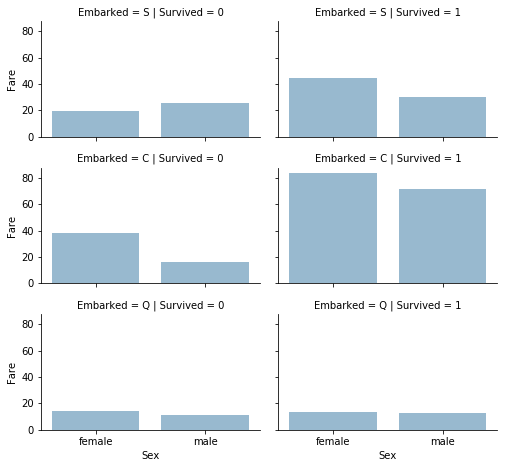

In [19]:
# Females overall had a better chance of survival, irregardless of port
# Emarkation Q had very low survival overall

#**Decision - Add sex to model training**
# Add embarked feature to model

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

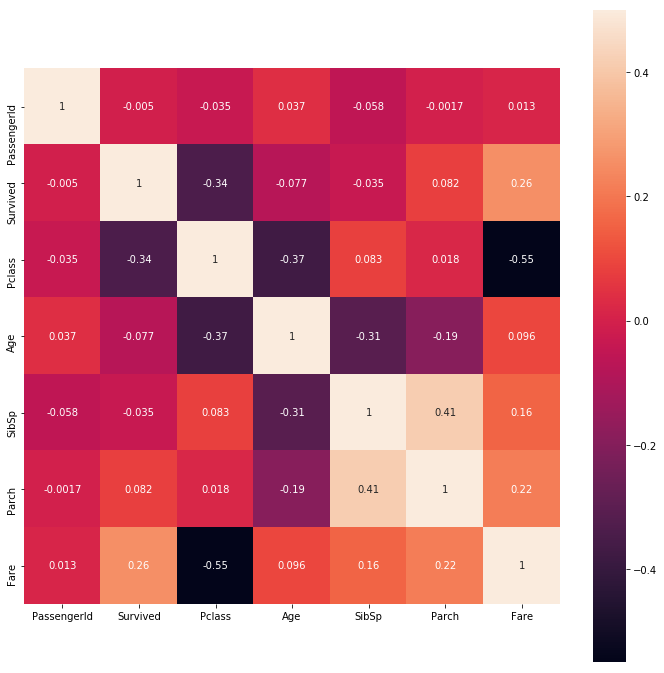

In [22]:
# higher fare payers had better survival
# Embarkation appears to correlate with survival
# Consider banding fare feature

C_mat = train_df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(C_mat, vmax=0.5, square=True, annot=True)
plt.show()

In [26]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 9) (891, 12) (418, 9)


('After', (891, 12), (418, 9), (891, 12), (418, 9))